In [1]:
import tensorflow as tf
from results.samuel.MobileNetV2_MC_advanced_decoder_2.custom import *
model_path = "results/samuel/MobileNetV2_MC_advanced_decoder_2/model.tf"
from load_data_predict import CustomDataGeneratorPredict

Number of samples:  3
Classes: [  0. 142. 255.]


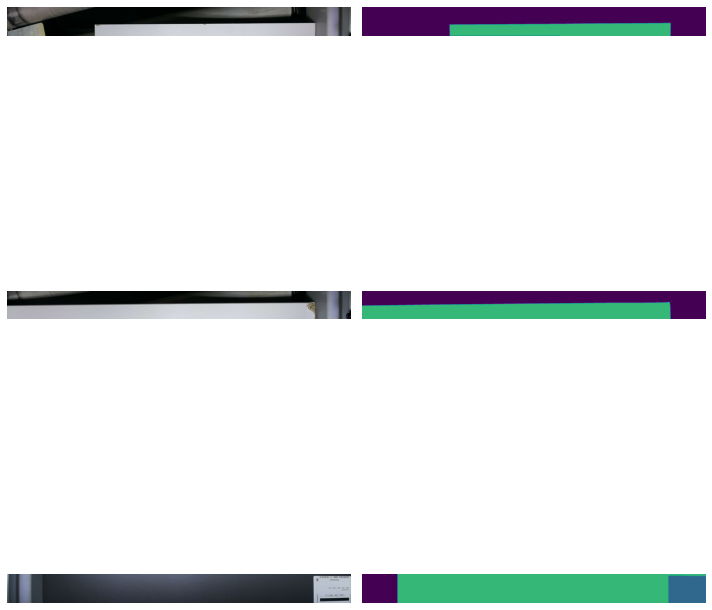

-1.0
1.0
0.0
2.0
[  0. 142. 255.]


In [2]:
img_dir = "Images/"
mask_dir = "Labels/"
image_extension = ".png"
mask_extension = ".png"
horizontal_split = 1
vertical_split = 1
# data_list = [["ckokey6vd002b3g68q5mmclyi", 3, 0],
#                     ["ckoklbzlb06qe3g688yq4w56s", 7, 0],
#                     ["ckokf3nzs00473g68e456ksi3", 1, 0]]
###### Unet big pictures ########
data_list = [["ckokey6vd002b3g68q5mmclyi", 0, 0],
                    # ["ckoklbzlb06qe3g688yq4w56s", 0, 0],
                    # ["ckokf3nzs00473g68e456ksi3", 0, 0],
                    ["ckok8ztbk0e753e5klwgdjjdh",0,0],
                    ["ckoklu4pl00253g68cgb8hwz5",0,0]]

test = CustomDataGeneratorPredict(data_list, img_dir, mask_dir, horizontal_split, vertical_split, image_extension, mask_extension, preprocess_fcn, onelabel)

test.plot_batch()

img, mask = test.__getitem__()
print(img.min())
print(img.max())
print(mask.min())
print(mask.max())
print(test.classes)


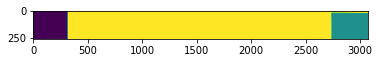

In [19]:
import matplotlib.pyplot as plt 
ExampleLabel1 = mask[1]

fig1 = plt.imshow(ExampleLabel1)
plt.tight_layout
fig1.figure.savefig('plots/ExampleLabel1.png')

ExampleLabel2 = mask[2]
fig2 = plt.imshow(ExampleLabel2)
plt.tight_layout
fig2.figure.savefig('plots/ExampleLabel2.png')

In [ ]:
model = tf.keras.models.load_model(model_path, custom_objects={"dice_metric": dice_metric, "jaccard_distance_loss": jaccard_distance_loss})
model.summary()

In [ ]:
preds = model.predict(x=img, verbose=1)

test.plot_prediction(preds)

In [ ]:
output_path = "plots/predictions/advanced_decoder/SC"
network_name = "MobileNetV2_SC_advanced_decoder_2"
test.save_batch(output_path, net_name=network_name, predictions=preds)